## This is Zach's Jupyter Notebook. If it changes unbeknownst to him, the sky will rain fire.

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv using pandas
df = pd.read_csv("./data/Warehouse_and_Retail_Sales.csv")

## Converting columns to NumPy arrays

In [6]:
#filter rows by year & month, adding columns to get monthly total
monthly=df.groupby(["YEAR","MONTH"]).sum()

#build real date column from year and month ex: 2017 + 4 -> "2017-04"
dates=pd.to_datetime(monthly.index.get_level_values(0).astype(str)+"-"+monthly.index.get_level_values(1).astype(str)+"-01")

warehouseSales=monthly["WAREHOUSE SALES"].values # is numpy array of warehouse sales
retailSales=monthly["RETAIL SALES"].values # numpy array of retail sales

## Create a 2x2 subplot grid

Text(0.5, 0.98, 'My Dashboard to Rename')

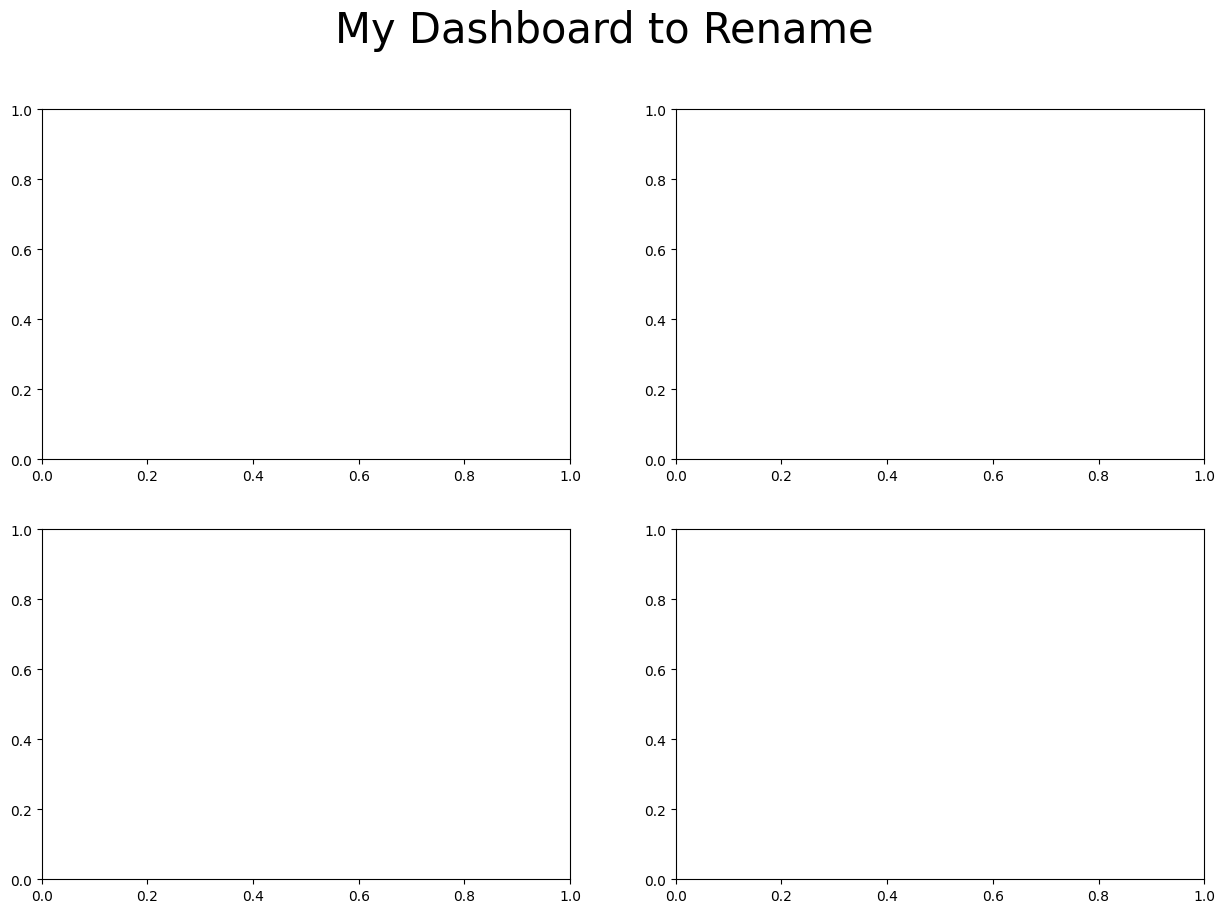

In [7]:
#creates a figure with 4 plots on a 2x2 grid
#shows a blueprint for axes becoming a 2d array 
# like axes[0,0], axes[0,1], axes[1,0], axes[1,1]
fig, axes = plt.subplots(2,2,figsize=(15,10))
#Title for entire dashboard
fig.suptitle("My Dashboard to Rename",fontsize=30)

Plot 1: Item Type by Year and Month